![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Visualization Examples

These examples show different ways of visualizing the data.




# Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from   sklearn.metrics import confusion_matrix, accuracy_score
from   sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as st


## Database loading

In this example, we will use two databases, the first `F40` consisting of a selection of the best 40 features used in a salmon spine detection problem (2 classes), and the second `F2` consisting of simulated data with Gaussian distributions of 2 features and 2 classes. In these examples, no data selection or normalization algorithm is performed.

In [ ]:
!wget https://www.dropbox.com/s/llymxic1dose83d/F40.zip
!unzip -qq F40

--2023-07-25 20:36:25--  https://www.dropbox.com/s/llymxic1dose83d/F40.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/llymxic1dose83d/F40.zip [following]
--2023-07-25 20:36:25--  https://www.dropbox.com/s/raw/llymxic1dose83d/F40.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1a1228e359275a6740f84abb9.dl.dropboxusercontent.com/cd/0/inline/CAj_FcnmmOVWJz-2SiXl9wTisVqPnO6df2IWmxGIVhLu6twRN2UC9ov1YuFkzAXEMTcMVFWMMCU-Hdu8jtNa6RSxMrav6RwpQFEOeIVo3UDjJzP4ObMIzTnwrRK6aOFdD4Q/file# [following]
--2023-07-25 20:36:26--  https://uce1a1228e359275a6740f84abb9.dl.dropboxusercontent.com/cd/0/inline/CAj_FcnmmOVWJz-2SiXl9wTisVqPnO6df2IWmxGIVhLu6twRN2UC9ov1YuFkzAXEMTcMVFWMMCU-Hdu8jtNa6RSxMrav6RwpQFEOeIVo3UDjJzP4ObMIzTnwrRK6aOFdD4Q/fil

In [ ]:
!wget https://www.dropbox.com/s/3w6k7vu3xpesjxh/F2.zip
!unzip -qq F2

--2023-07-25 20:36:27--  https://www.dropbox.com/s/3w6k7vu3xpesjxh/F2.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3w6k7vu3xpesjxh/F2.zip [following]
--2023-07-25 20:36:27--  https://www.dropbox.com/s/raw/3w6k7vu3xpesjxh/F2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc68fe5c878bd0d8b3492c8b3a84.dl.dropboxusercontent.com/cd/0/inline/CAiZ9CVCV0mwvB0Qk2VaVoChLyYAtZorP8vbRi5ydezquWu2kC_j2VLs5BtZHkX_mUXQyblFYswtzPed_5etSNf9Ktfmhw_P5Y0FS1QZkwudttE6brsr39gB8ePMcMPSpvA/file# [following]
--2023-07-25 20:36:27--  https://uc68fe5c878bd0d8b3492c8b3a84.dl.dropboxusercontent.com/cd/0/inline/CAiZ9CVCV0mwvB0Qk2VaVoChLyYAtZorP8vbRi5ydezquWu2kC_j2VLs5BtZHkX_mUXQyblFYswtzPed_5etSNf9Ktfmhw_P5Y0FS1QZkwudttE6brsr39gB8ePMcMPSpvA/file
R

## Functions

In [ ]:
def load_features(prefix):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')               # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytrain = ytrain.astype(int)
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))     # testing labels
    ytest = ytest.astype(int)
    print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
    print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
    print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
    return Xtrain,ytrain,Xtest,ytest

def print_confusion(dt,ds,show_heatmap=0,Cnorm=1):
    # dt - true, ds - predicted
    C   = confusion_matrix(dt,ds)
    print('Confusion Matrix:')
    print(C)
    acc = accuracy_score(dt,ds)
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    if show_heatmap:
      sns.heatmap(C/Cnorm, annot=True, cbar=None, cmap="Blues")
      plt.title("Confusion Matrix: Acc ="+acc_st)
      plt.tight_layout()
      plt.ylabel("True Class"), plt.xlabel("Predicted Class")
      plt.show()

def plot_decision_lines(clf,X,show=0,decisionline=1):
    # based on example of https://scikit-learn.org
    h = 0.05
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if show==1:
      plt.figure(figsize=(12,8))
    if decisionline == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.6)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show==1:
        plt.show()

def show_clf_results(clf,X,d,Xt,dt,d0,ds,st,decisionline=1):
    gs = gridspec.GridSpec(1, 2)
    fig = plt.figure(figsize=(18, 6))
    print('Training:')
    acc = accuracy_score(d,d0)
    accst = f'Acc = {acc:.4f}'
    ax = plt.subplot(gs[0,0])
    print_confusion(d,d0)                                         # confusion matrix in training
    plot_decision_lines(clf,X,show=0,decisionline=decisionline)   # decision lines
    plot_features(X,d,st+' - Training: '+accst,show=0)            # feature space in training
    ax = plt.subplot(gs[0,1])
    print('Testing:')
    acc = accuracy_score(ds,dt)
    accst = f'Acc = {acc:.4f}'
    print_confusion(dt,ds)                                        # confusion matrix in testing
    plot_decision_lines(clf,X,show=0,decisionline=decisionline)   # decision lines
    plot_features(Xt,dt,st+' - Testing: '+accst,show=0)           # feature space in testing

def plot_features(X,d,st,show=1):
    dmin = int(np.min(d))
    dmax = int(np.max(d))
    if show==1:
      plt.figure(figsize=(12,8))
    for j in range(dmin,dmax+1):
        plt.scatter(X[d==j,0],X[d==j,1],label=str(j),s=27)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()

def plot_features3(X,d,st,show=1,view=(30,60)):
    dmin = int(np.min(d))
    dmax = int(np.max(d))
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    for j in range(dmin,dmax+1):
        ax.scatter(X[d==j,0],X[d==j,1],X[d==j,2],label=str(j),s=27)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('$x_1$',fontsize=14)
    ax.set_ylabel('$x_2$',fontsize=14)
    ax.set_zlabel('$x_3$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()


## F40 database

F40 consists of a selection of the best 40 features used in a salmon spine detection problem (2 classes). For the visualization we will use all available data, i.e. 264 samples, with 40 features.

In [ ]:
Xtrain40,ytrain,Xtest40,ytest   = load_features('F40/F40')   # load training and testing data

X40 = np.concatenate((Xtrain40,Xtest40),axis=0)
y = np.concatenate((ytrain,ytest),axis=0)
print('   Concatened: '+str(X40.shape[0]) +' samples with '+str(X40.shape[1]) +' features')


Training data: 211 samples with 40 features
 Testing data: 53 samples with 40 features
      Classes: 1...2
   Concatened: 264 samples with 40 features


## Visualization of 5 Characteristics

The 40 features have been sorted by relevance (they were selected using SFS). We show below the top 5.

5 selected features.
          x_1       x_2       x_3       x_4       x_5  classes
0    0.107065  0.946153  0.699273  0.587316  0.953015        1
1    0.169599  0.923520  0.592226  0.707888  0.893520        1
2    0.224238  0.984150  0.386649  0.878525  0.907532        1
3    0.074827  0.882374  0.825545  0.484049  0.827650        1
4    0.140159  0.926573  0.679080  0.640670  0.871661        1
..        ...       ...       ...       ...       ...      ...
259  0.245619  0.656019  0.357384  0.852396  0.582982        2
260  0.357365  0.850619  0.118935  0.985160  0.863702        2
261  0.332517  0.858322  0.282100  0.936357  0.646018        2
262  0.007685 -0.099073  0.770384  0.571360  0.051998        2
263  0.338418  0.604882  0.211134  0.953886  0.361086        2

[264 rows x 6 columns]


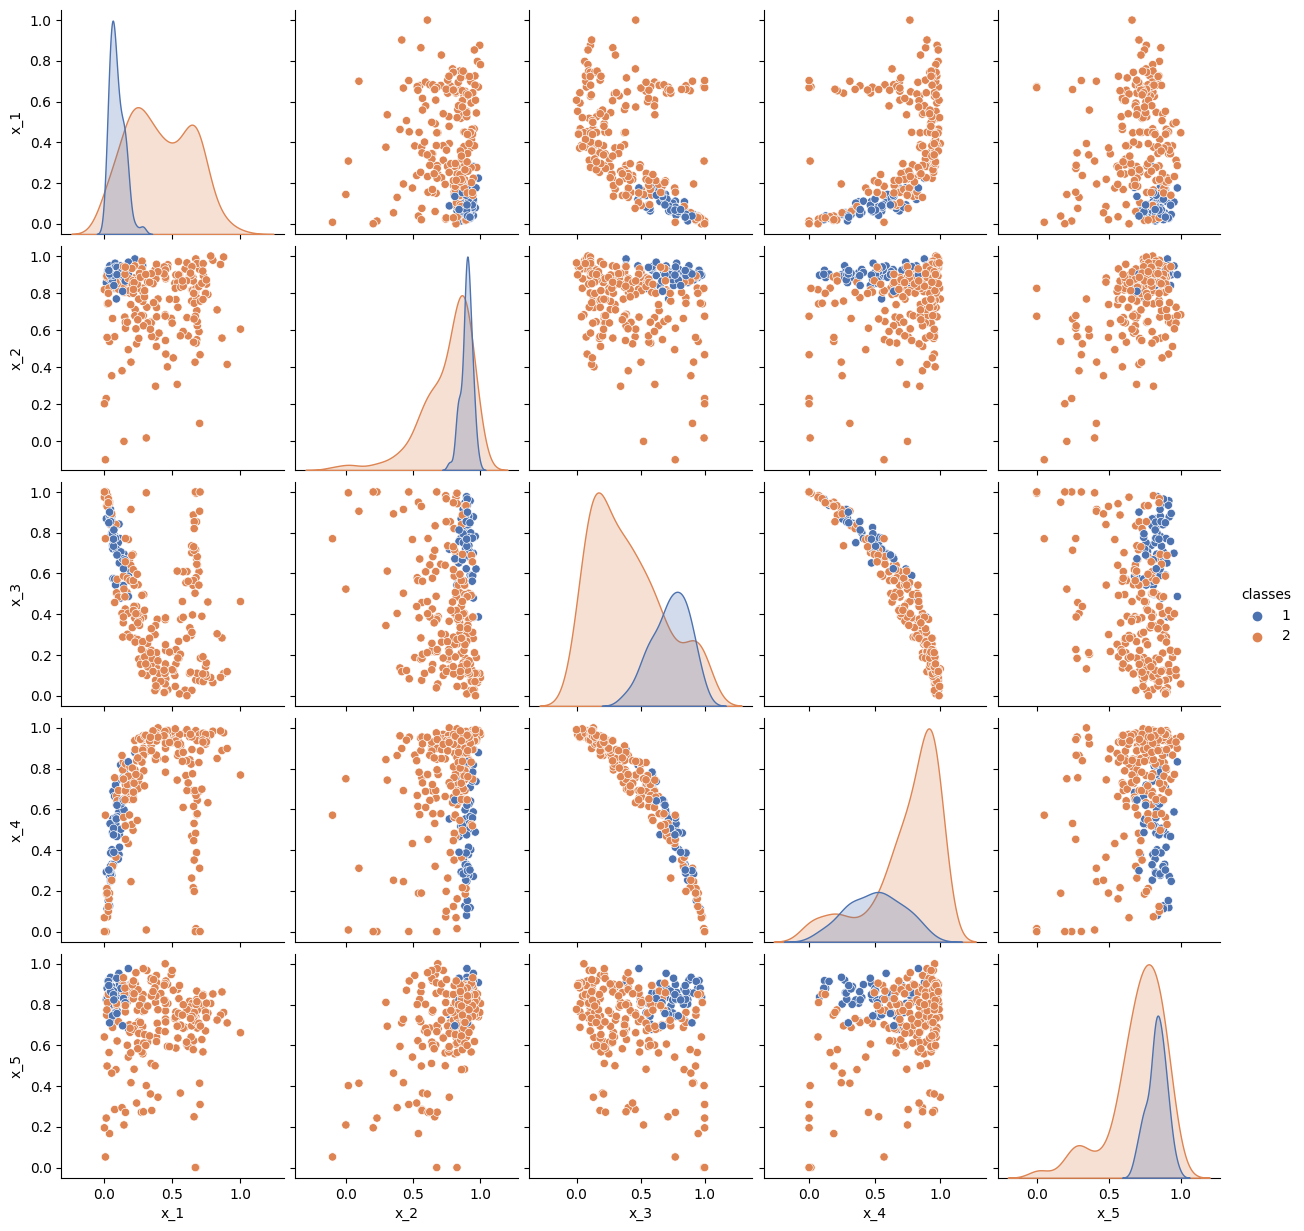

In [ ]:
X5 = X40[:,0:5] # Se escogen las primeras 5 características

print(str(X5.shape[1])+' selected features.')

df1 = pd.DataFrame(X5, columns = ['x_1','x_2','x_3','x_4','x_5'])
df2 = pd.DataFrame(y,columns = ['classes'])
df = pd.concat([df1, df2], axis=1)
print(df)

sns.pairplot(df,hue='classes',palette="deep")

## Display of 3 Features

3D graphics for the first 3 features.

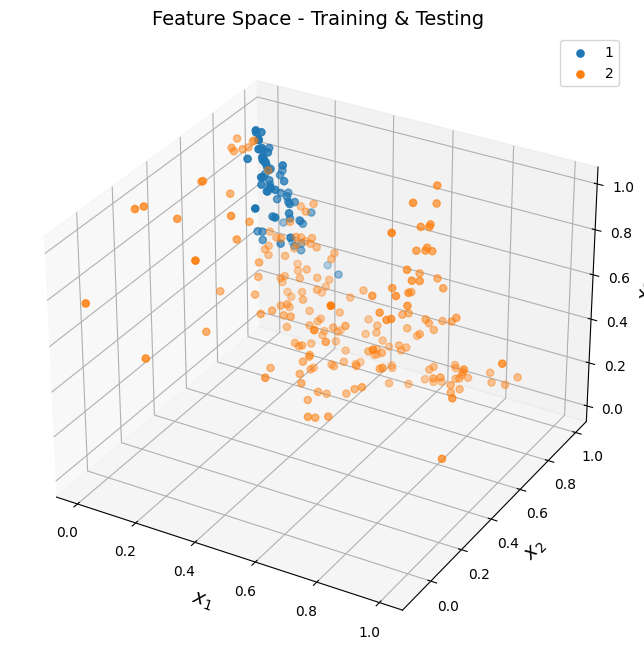

In [ ]:
X3 = X40[:,0:3]

plot_features3(X3,y,'Training & Testing')

## Visualization of 2 Features

2D graphics for the first 2 features.

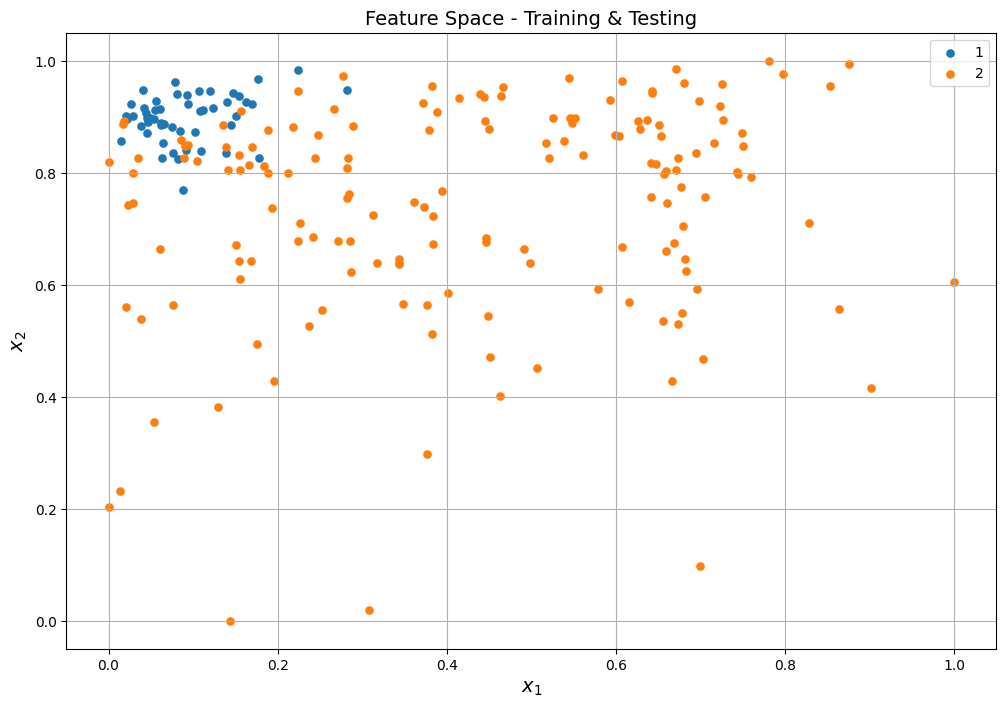

In [ ]:
X2 = Xtrain40[:,0:2]

plot_features(X2,ytrain,'Training & Testing')

## Database F2

F2 consists of simulated data with Gaussian distributions of 2 features and 2 classes.

# Visualization of 2 features

For the visualization we will use all available data, i.e. 1200 samples, with 2 characteristics (and 2 classes) to show different visualizations.

In [ ]:
Xtrain,ytrain,Xtest,ytest   = load_features('F2/F2')   # load training and testing data
X = np.concatenate((Xtrain,Xtest),axis=0)
y = np.concatenate((ytrain,ytest),axis=0)
print('   Concatened: '+str(X.shape[0]) +' samples with '+str(X.shape[1]) +' features')


Training data: 800 samples with 2 features
 Testing data: 400 samples with 2 features
      Classes: 0...1
   Concatened: 1200 samples with 2 features


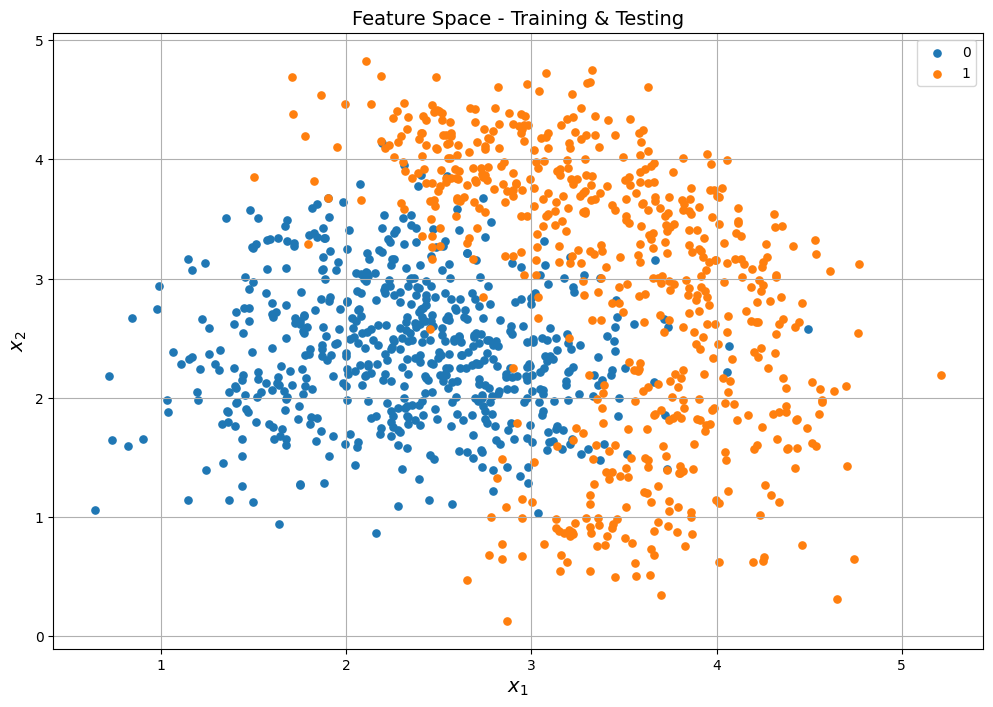

In [ ]:
plot_features(X,y,'Training & Testing')

           x_1       x_2  classes
0     1.468930  1.880148        0
1     2.546401  2.657123        0
2     1.194646  2.050108        0
3     1.887354  2.997270        0
4     2.492454  1.820105        0
...        ...       ...      ...
1195  3.287782  3.733354        1
1196  3.196743  3.589584        1
1197  4.561013  2.076128        1
1198  3.452913  3.574287        1
1199  2.562258  4.314917        1

[1200 rows x 3 columns]


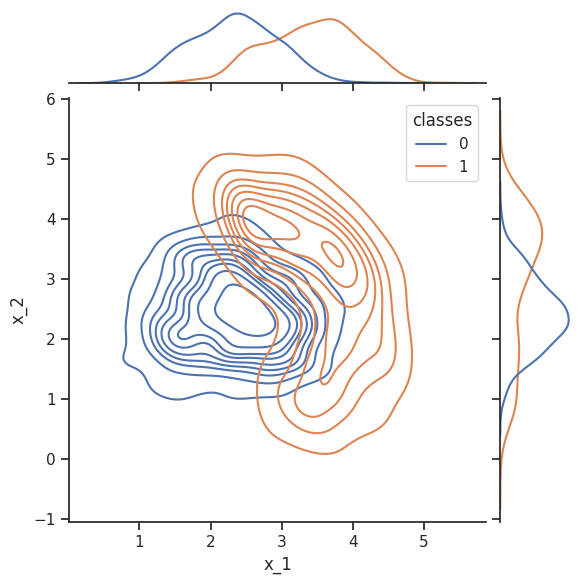

In [ ]:
sns.set_theme(style="ticks")
df1 = pd.DataFrame(X, columns = ['x_1','x_2'])
df2 = pd.DataFrame(y,columns = ['classes'])
df = pd.concat([df1, df2], axis=1)
print(df)
sns.jointplot(data=df,x="x_1", y="x_2", hue="classes",kind="kde",palette="deep")

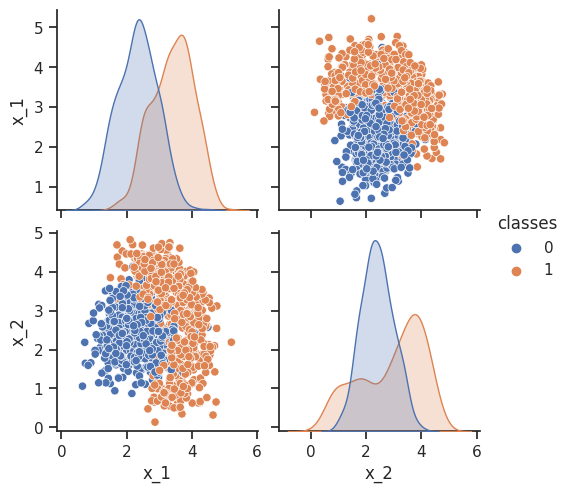

In [ ]:
sns.pairplot(df,hue='classes',palette="deep")

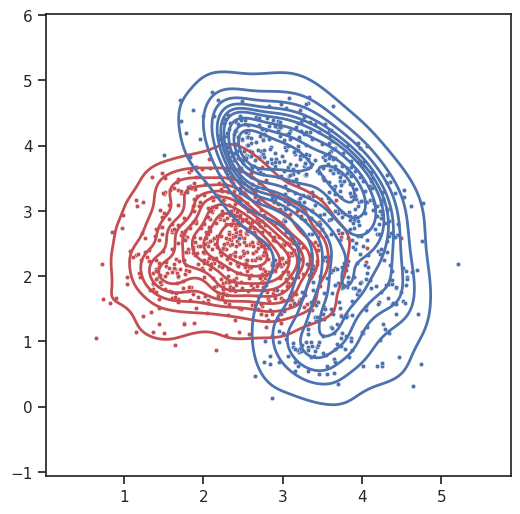

In [ ]:
ymin = int(np.min(y))
ymax = int(np.max(y))
f, ax = plt.subplots(figsize=(6, 6))

cm = ["Reds","mako"]
cb = ['r','b']

for j in range(ymin,ymax+1):
    x_1 = X[y==j,0]
    x_2 = X[y==j,1]
    sns.scatterplot(x=x_1, y=x_2, s=10, color=cb[j])
    sns.kdeplot(x=x_1, y=x_2, levels=10, color=cb[j], linewidths=2)


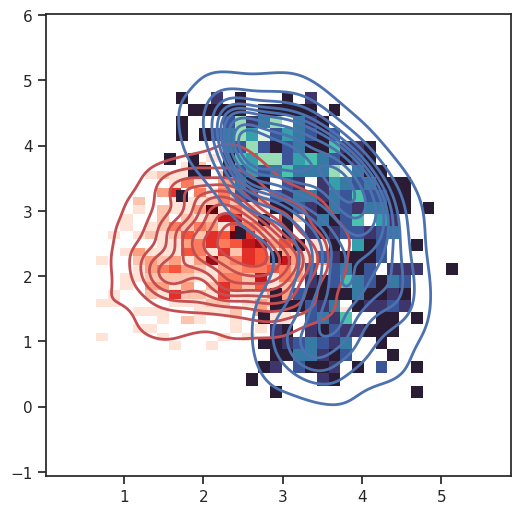

In [ ]:
ymin = int(np.min(y))
ymax = int(np.max(y))
f, ax = plt.subplots(figsize=(6, 6))

cm = ["Reds","mako"]
cb = ['r','b']

for j in range(ymin,ymax+1):
    x_1 = X[y==j,0]
    x_2 = X[y==j,1]
    sns.histplot(x=x_1, y=x_2, bins=25, pthresh=-1, cmap=cm[j])
    sns.kdeplot(x=x_1, y=x_2, levels=10, color=cb[j], linewidths=2)


<ipython-input-15-e933176b8356>:7: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=a1['x_1'],y=a1['x_2'], shade=False,cmap=cm[j], shade_lowest=False)
<ipython-input-15-e933176b8356>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=a1['x_1'],y=a1['x_2'], shade=False,cmap=cm[j], shade_lowest=False)
<ipython-input-15-e933176b8356>:7: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=a1['x_1'],y=a1['x_2'], shade=False,cmap=cm[j], shade_lowest=False)
<ipython-input-15-e933176b8356>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update

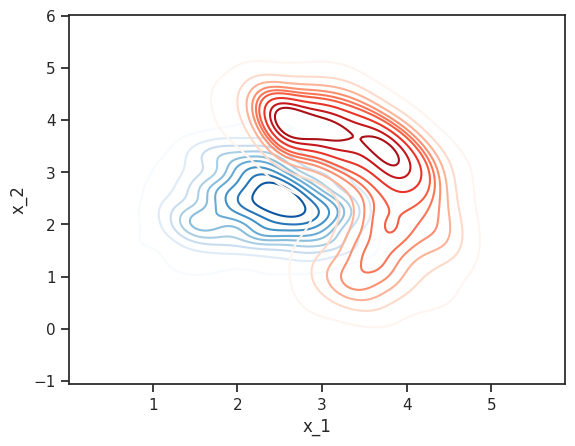

In [ ]:
ymin = int(np.min(y))
ymax = int(np.max(y))

cm = ['Blues','Reds','Greens']
for j in range(ymin,ymax+1):
  a1 = df.query("classes=="+str(j))
  sns.kdeplot(x=a1['x_1'],y=a1['x_2'], shade=False,cmap=cm[j], shade_lowest=False)

Text(0.5, 1.0, 'Ambas classes juntas')

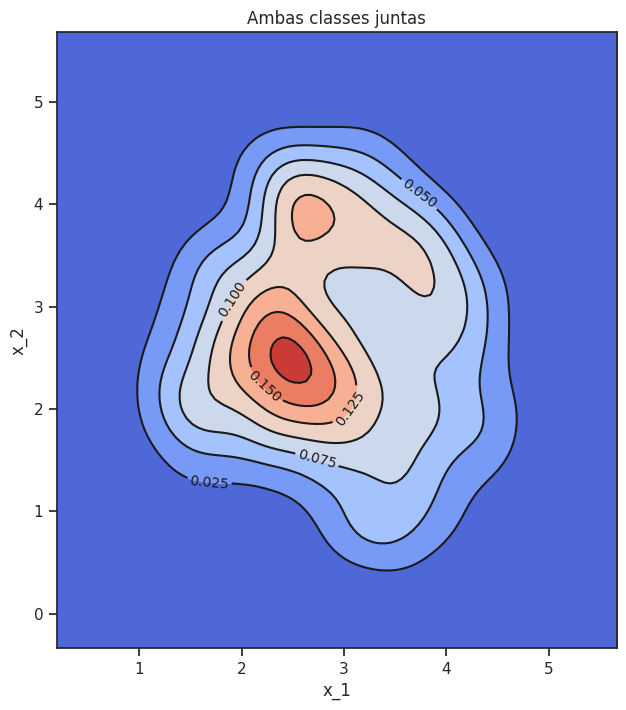

In [ ]:
# Extract x and y
x_1 = X[:, 0]
x_2 = X[:, 1]
# Define the borders
delta1 = (max(x_1) - min(x_1))/10
delta2 = (max(x_2) - min(x_2))/10
xmin1 = min(x_1) - delta1
xmax1 = max(x_1) + delta1
xmin2 = min(x_2) - delta2
xmax2 = max(x_1) + delta2
# Create meshgrid
xx1, xx2 = np.mgrid[xmin1:xmax1:100j, xmin2:xmax2:100j]

positions = np.vstack([xx1.ravel(), xx2.ravel()])
values = np.vstack([x_1, x_2])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx1.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin1, xmax1)
ax.set_ylim(xmin2, xmax2)
cfset = ax.contourf(xx1, xx2, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin1, xmax1, xmin2, xmax2])
cset = ax.contour(xx1, xx2, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.title('Ambas classes juntas')

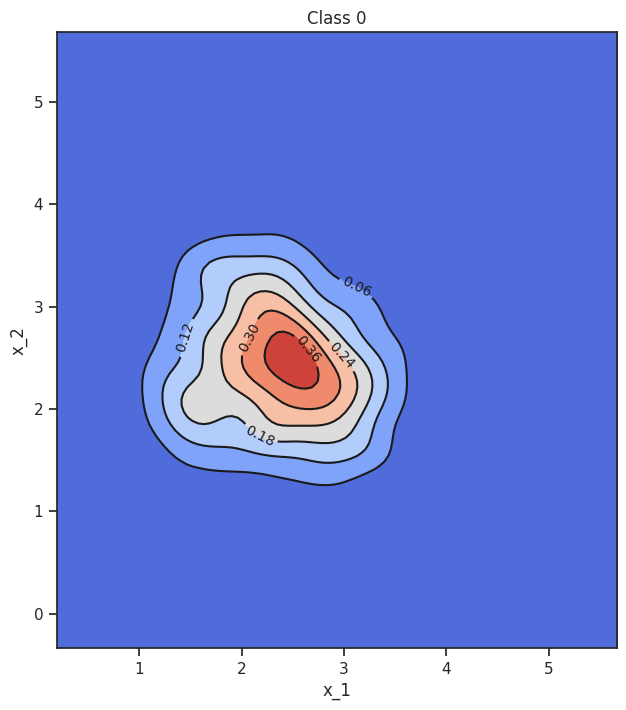

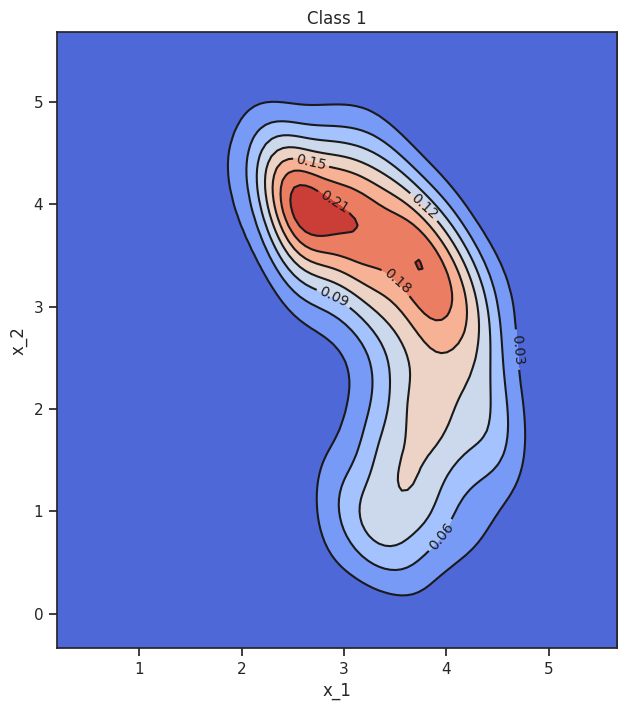

In [ ]:
# Extract x_1 and x_2
x_1 = X[:, 0]
x_2 = X[:, 1]
# Define the borders
delta1 = (max(x_1) - min(x_1))/10
delta2 = (max(x_2) - min(x_2))/10
xmin1 = min(x_1) - delta1
xmax1 = max(x_1) + delta1
xmin2 = min(x_2) - delta2
xmax2 = max(x_1) + delta2
# Create meshgrid
xx1, xx2 = np.mgrid[xmin1:xmax1:100j, xmin2:xmax2:100j]

positions = np.vstack([xx1.ravel(), xx2.ravel()])

for j in range(2):

  x_1 = X[y==j, 0]
  x_2 = X[y==j, 1]
  values = np.vstack([x_1, x_2])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx1.shape)

  fig = plt.figure(figsize=(8,8))
  ax = fig.gca()
  ax.set_xlim(xmin1, xmax1)
  ax.set_ylim(xmin2, xmax2)
  cfset = ax.contourf(xx1, xx2, f, cmap='coolwarm')
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin1, xmax1, xmin2, xmax2])
  cset = ax.contour(xx1, xx2, f, colors='k')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')
  plt.title('Class '+str(j))

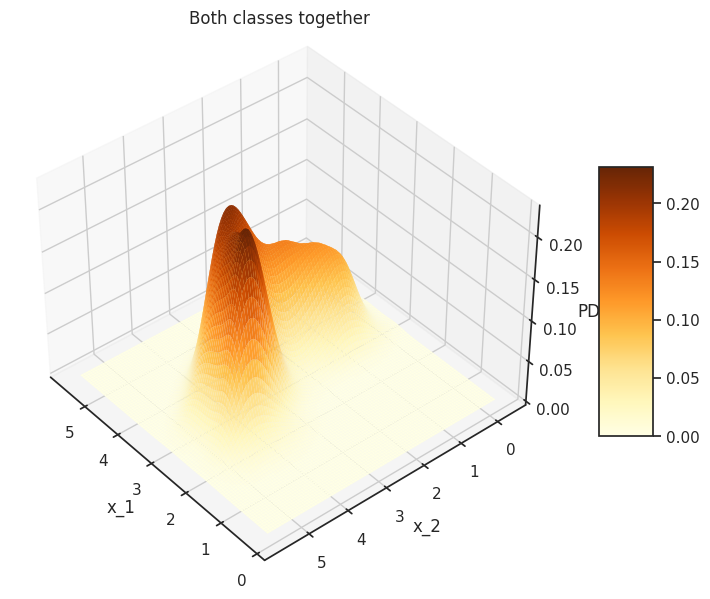

In [ ]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx1, xx2, f, rstride=1, cstride=1, cmap='YlOrBr', edgecolor='none')
# ver más colores de cmap en https://seaborn.pydata.org/tutorial/color_palettes.html
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('PDF')
ax.set_title('Both classes together')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(40, 140)

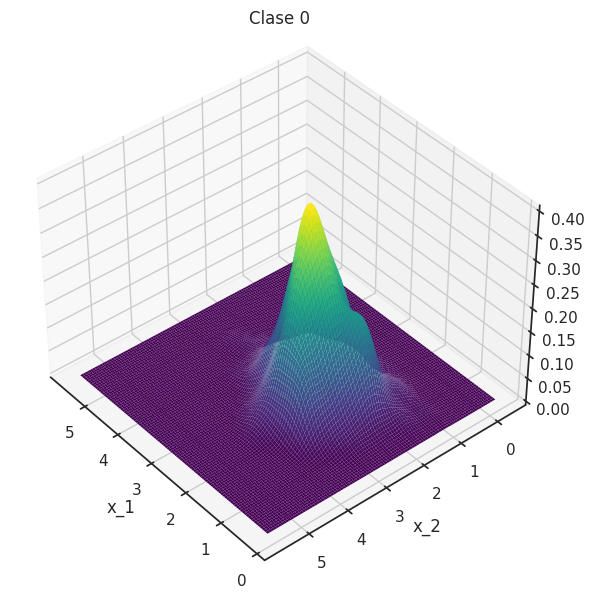

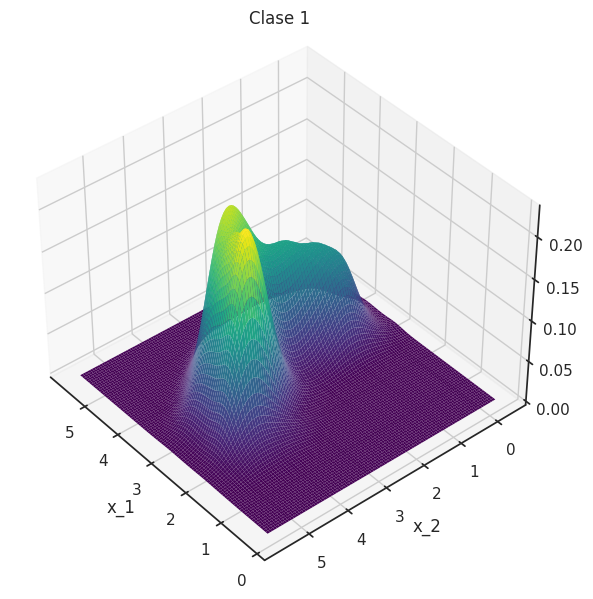

In [ ]:

ymin = int(np.min(y))
ymax = int(np.max(y))


for j in range(ymin,ymax+1):
    x_1 = X[y==j,0]
    x_2 = X[y==j,1]
    values = np.vstack([x_1, x_2])
    kernel = st.gaussian_kde(values)
    fig = plt.figure(figsize=(13, 7))
    ax = plt.axes(projection='3d')
    f = np.reshape(kernel(positions).T, xx1.shape)
    surf = ax.plot_surface(xx1, xx2, f, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    # see more colors for cmap at https://seaborn.pydata.org/tutorial/color_palettes.html
    ax.view_init(40, 140)
    plt.title('Clase '+str(j))
    plt.xlabel('x_1')
    plt.ylabel('x_2')


## Visualization of 1 feature

           x_1  classes
0     1.468930        0
1     2.546401        0
2     1.194646        0
3     1.887354        0
4     2.492454        0
...        ...      ...
1195  3.287782        1
1196  3.196743        1
1197  4.561013        1
1198  3.452913        1
1199  2.562258        1

[1200 rows x 2 columns]


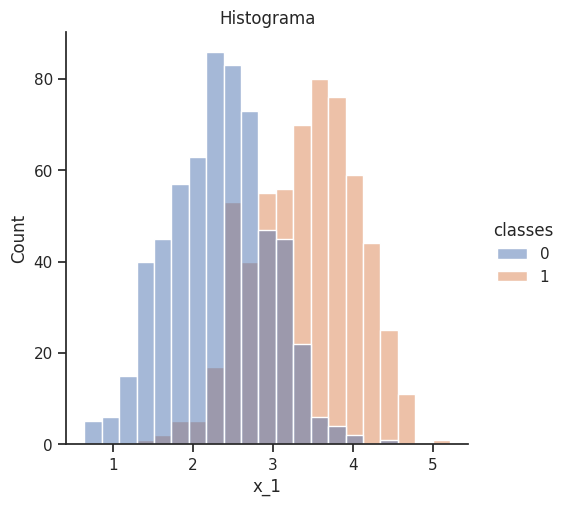

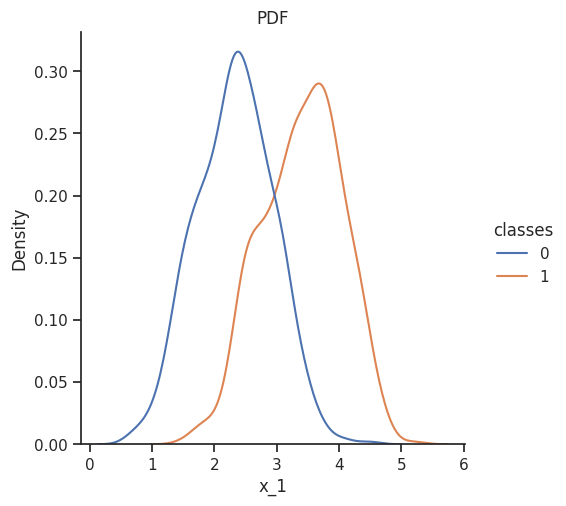

In [ ]:
X1 = X[:,0]
df1 = pd.DataFrame(X1, columns = ['x_1'])
df2 = pd.DataFrame(y,columns = ['classes'])
df = pd.concat([df1, df2], axis=1)
print(df)
# Histogram
sns.displot(data=df, x="x_1", hue="classes",palette="deep").set(title='Histograma')
# PDF
sns.displot(data=df, x="x_1", hue="classes",kind="kde",palette="deep").set(title='PDF')


<ipython-input-21-d8fdc4f534d9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="x_1", hue="classes",shade=True,palette="deep").set(title='PDF')


[Text(0.5, 1.0, 'PDF')]

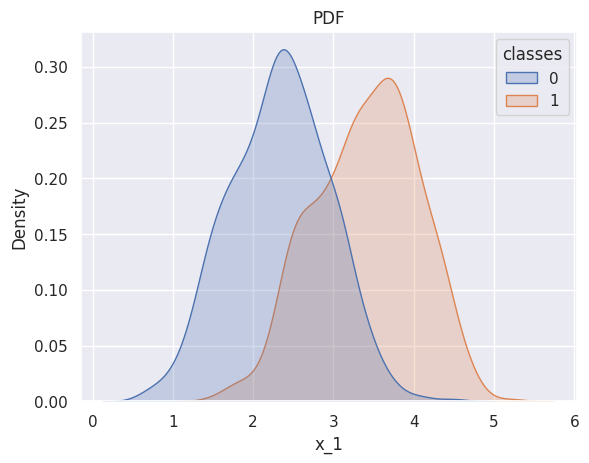

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

# plotting both distibutions on the same figure
sns.kdeplot(data=df, x="x_1", hue="classes",shade=True,palette="deep").set(title='PDF')



# Classification and Evaluation

## KNN

We will use the total data `(X,y)` defined above in 'Database F2'.

In this example `X` has 1200 samples, 2 features and 2 classes. We will randomly choose 80% for training and 20% for testing. The classification is done by a 5-neighbor KNN.

In [ ]:
# 0. Definición Training/Testing: (X,y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

print('Training: muestras de clase 0: '+str(np.sum(ytrain==0)))
print('                      clase 1: '+str(np.sum(ytrain==1)))
print('                        Total: '+str(len(ytrain)))
print(' ')
print(' Testing: muestras de clase 0: '+str(np.sum(ytest==0)))
print('                      clase 1: '+str(np.sum(ytest==1)))
print('                        Total: '+str(len(ytest)))


from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
acc	 = accuracy_score(ypred,ytest)
print('Acc = '+str(acc*100))

Training: muestras de clase 0: 481
                      clase 1: 479
                        Total: 960
 
 Testing: muestras de clase 0: 119
                      clase 1: 121
                        Total: 240
Acc = 91.66666666666666


## Visualization of the Confusion Matrix

Confusion Matrix:
[[108  11]
 [  9 112]]
Accuracy = 91.67


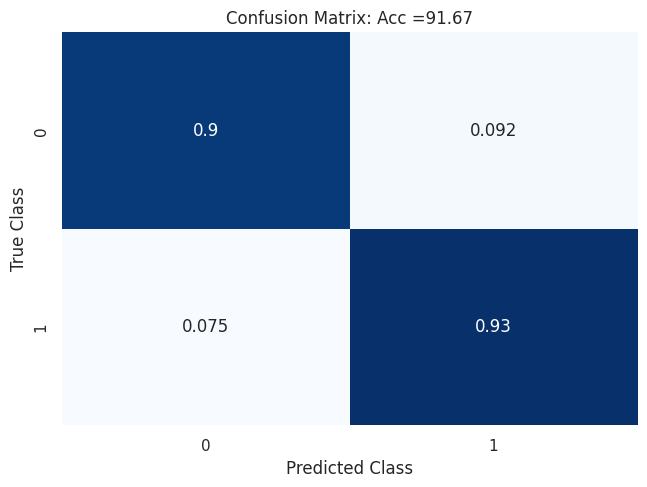

In [ ]:
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=120)


## Visualization of Decision Line




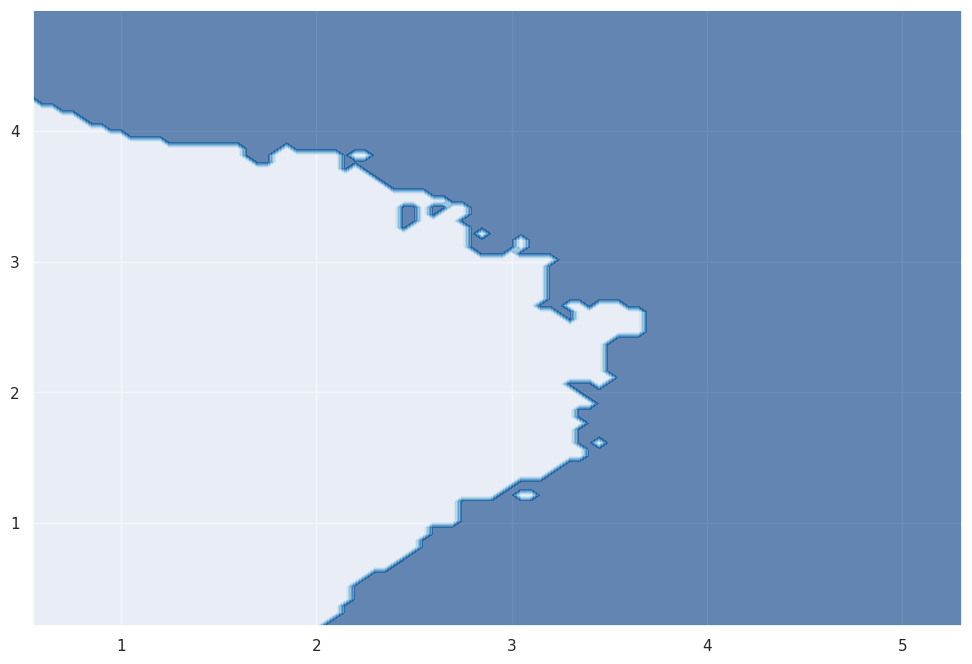

In [ ]:
plot_decision_lines(clf,Xtrain,show=1)

## Visualization of Decision Line with Samples




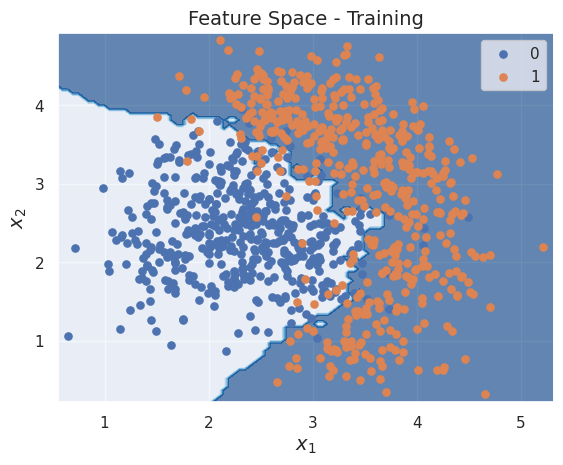

In [ ]:
plot_decision_lines(clf,Xtrain,show=0)
plot_features(Xtrain,ytrain,'Training',show=0)


## Total Visualizacion

Training:
Confusion Matrix:
[[454  27]
 [ 32 447]]
Accuracy = 93.85
Testing:
Confusion Matrix:
[[108  11]
 [  9 112]]
Accuracy = 91.67


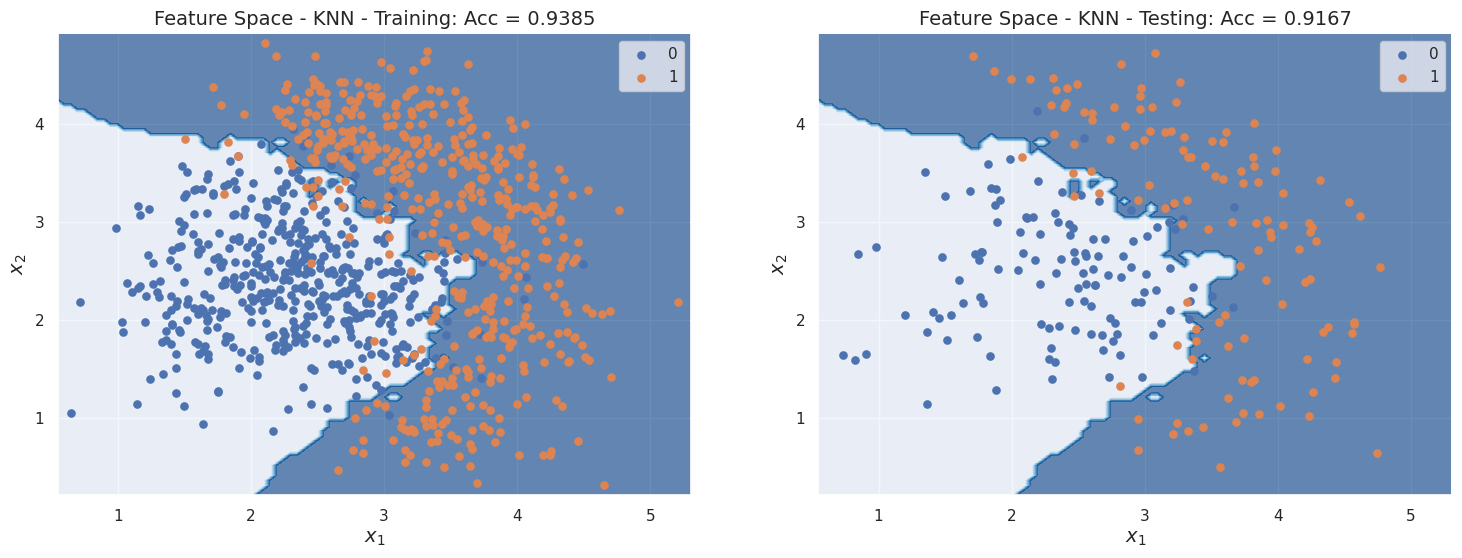

In [ ]:
ypred_train  = clf.predict(Xtrain)

show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,ypred_train,ypred,'KNN')    # show performance and feature space

# Bonus: Manifold Learning methods

In [ ]:
Xtrain40,ytrain,Xtest40,ytest   = load_features('F40/F40')   # load training and testing data

X40 = np.concatenate((Xtrain40,Xtest40),axis=0)
y = np.concatenate((ytrain,ytest),axis=0)
print('   Concatened: '+str(X40.shape[0]) +' samples with '+str(X40.shape[1]) +' features')


Training data: 211 samples with 40 features
 Testing data: 53 samples with 40 features
      Classes: 1...2
   Concatened: 264 samples with 40 features


In [ ]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>
# From: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
#Axes3D


XX = np.concatenate((Xtrain40,Xtest40),axis=0)
y = np.concatenate((ytrain,ytest),axis=0)


X = XX[:,0:40]
color = y

n_neighbors = 50
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (X.shape[0], n_neighbors), fontsize=14)


# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods                 = OrderedDict()
#methods['LLE']          = LLE(method='standard')
methods['LTSA']         = LLE(method='ltsa')
methods['Hessian LLE']  = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap']       = manifold.Isomap(n_neighbors, n_components)
methods['MDS']          = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE']           = manifold.SpectralEmbedding(n_components=n_components,n_neighbors=n_neighbors)
methods['t-SNE']        = manifold.TSNE(n_components=n_components, init='random',random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

TypeError: ignored

<Figure size 1500x800 with 0 Axes>